## Path planning for the expert advice
This notebook is for visualizing the advice model in RobotEnv-v0. Make sure to run a training session or the `precompute_advice.py` script first to generate the occupancy grid and advice.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, str(Path("..").resolve()))
from gpairls.webots import config as env_config
from gpairls.webots.robot_env import utils

In [2]:
occ_grid = np.load(env_config.OCCUPANCY_GRID_PATH)
advice_grid = np.load(env_config.ADVICE_GRID_PATH)

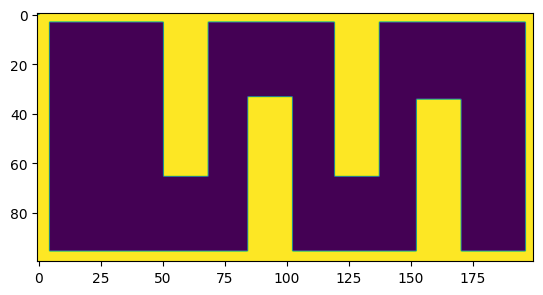

In [3]:
plt.imshow(occ_grid)

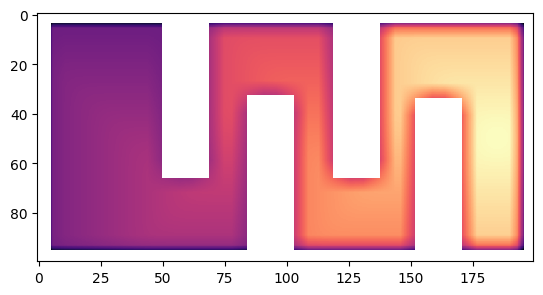

In [4]:
pf = utils.compute_potential_field(occ_grid, (50, 185))
plt.imshow(pf, cmap="magma_r")

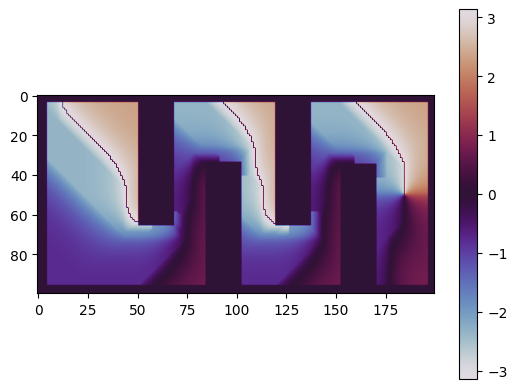

In [5]:
# advice_grid = utils.compute_advice_grid(occ_grid, (50, 185))
plt.imshow(advice_grid, cmap="twilight")
plt.colorbar()

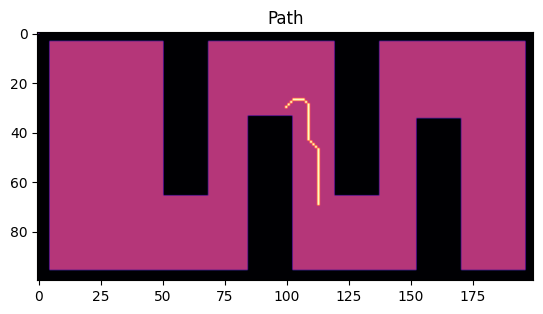

In [6]:
start_pos = (30, 100)

MARKER = -1

occ_grid2 = occ_grid.copy()
pos = start_pos

for i in range(50):
    occ_grid2[pos] = MARKER
    neighbors = utils.get_neighbors(pos, pf.shape)
    neighbor_pots = [pf[n] for n in neighbors]
    pos = neighbors[np.argmin(neighbor_pots)]

plt.imshow(occ_grid2, cmap="magma_r")
plt.title("Path")
plt.show()